# Scikit-learn Intro
Scikit-learn is a very powerful machine learning library in Python.

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in the data
housing = pd.read_csv('data/housing.csv')

In [8]:
# find all the highest correlated variables
housing.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [9]:
housing_best = housing[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']]
sale_price = housing['SalePrice']

In [10]:
housing_best.head()

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,1710,2,548
1,6,1262,2,460
2,7,1786,2,608
3,7,1717,3,642
4,8,2198,3,836


In [12]:
housing_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
GarageArea     1460 non-null int64
dtypes: int64(4)
memory usage: 45.7 KB


In [66]:
housing_best = housing_best.astype({'OverallQual':'category', 'GarageCars':'category'})
housing_best.head()

,OverallQual,GrLivArea,GarageCars,GarageArea
0,7,1710,2,548
1,6,1262,2,460
2,7,1786,2,608
3,7,1717,3,642
4,8,2198,3,836


In [67]:
housing_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
OverallQual    1460 non-null category
GrLivArea      1460 non-null int64
GarageCars     1460 non-null category
GarageArea     1460 non-null int64
dtypes: category(2), int64(2)
memory usage: 26.3 KB


In [94]:
housing_best_numeric = housing_best.select_dtypes(['number'])
housing_best_cat = housing_best.select_dtypes(['category'])

In [95]:
housing_best_numeric_scaled = housing_best_numeric.apply(lambda x: (x - x.mean())/x.std())

In [98]:
housing_best_concat = pd.concat([housing_best_numeric_scaled, housing_best_cat], axis='columns')

In [99]:
housing_best_concat.dtypes

GrLivArea       float64
GarageArea      float64
OverallQual    category
GarageCars     category
dtype: object

In [100]:
housing_best_dummy = pd.get_dummies(housing_best_concat)
housing_best_dummy.head()

,GrLivArea,GarageArea,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,0.370207,0.350880,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,-0.482347,-0.060710,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.514836,0.631510,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.383528,0.790533,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1.298881,1.697903,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [202]:
X = housing_best_dummy.values
y = np.log(sale_price.values)

lm = LinearRegression()
kf = KFold(10, shuffle=True)

In [203]:
lm.fit(X, y)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([ 0.84256687,  0.7910269 ,  0.71135442,  0.78999713,  0.68231804,
        0.81808695,  0.77996118,  0.7409079 ,  0.75854002,  0.82418954])

In [119]:
from sklearn.linear_model import Lasso

In [173]:
lasso = Lasso(alpha=.001)
cross_val_score(lasso, X, y, cv=kf, scoring='r2')

In [175]:
alphas = np.logspace(-4,0)
scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores.append(cross_val_score(lasso, X, y, cv=kf, scoring='r2').mean())

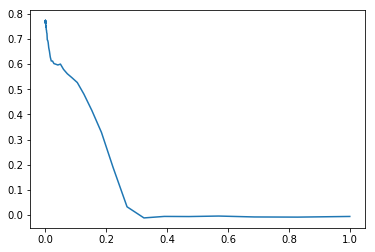

In [176]:
plt.plot(alphas, scores)

## Ridge Regression

In [177]:
from sklearn.linear_model import Ridge

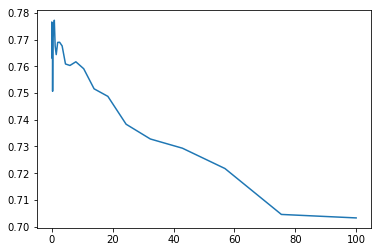

In [189]:
alphas = np.logspace(-4,2)
scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores.append(cross_val_score(ridge, X, y, cv=kf, scoring='r2').mean())
plt.plot(alphas, scores)

## Random Forest

In [192]:
from sklearn.ensemble import RandomForestRegressor

In [193]:
rfr = RandomForestRegressor(n_estimators=20)

In [200]:
cross_val_score(rfr, X, y, cv=kf, scoring='r2')

array([ 0.75007906,  0.69011681,  0.74849885,  0.70793009,  0.74225712,
        0.8382181 ,  0.78375122,  0.66731672,  0.7991164 ,  0.72702729])

## Suppor Vector Machines

In [204]:
from sklearn.svm import SVR

In [209]:
svr = SVR(kernel='linear')

In [212]:
svr = SVR(kernel='linear')
cross_val_score(svr, X, y, cv=kf, scoring='r2').mean()

0.77362831652596409

In [213]:
svr = SVR(kernel='rbf')
cross_val_score(svr, X, y, cv=kf, scoring='r2').mean()

0.78622214461938889

## Resources
+ [Scikit-learn docs](http://scikit-learn.org/stable/)